# Myopic Foresight with Constraints Implemented 
Katherine Shaw
Jun 3 2023

based off our conversation with Tob Brown on June 2, going to use the myopic foresight (he said that is more akin to what they usually do anyway), and try to implement a constraint for each planning horizon for the relevant attributes 

Steps for Evaluation: 

- How do each of the relevant items for our 'technology delay' RQ behave in the myopic foresight scenarios? 
    - ie. Hydrogen, power_to_gas, and CC and CCUS? 
- if it's a unidirectional use, can I just limit the store fill for each planning period? (as I did before with local constraints?)
- what could I change in the files, and how do I make sure those files are maintained between when I load the network the first time and when I run them?

#### June 4 : It worked! Referencing Pypsa De, use the first technological occurance function in solve_network.py, and solve_myopic.smk update of the params to match with the function, in order to limit when a technology can be extended in the myopic situation. Further analysis conducted in new notebook "Myopic, Time Delay Constraint, Comparison of Configurations"

## Loading the network 

In [15]:
filepath_2025 = '/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2025.nc'
filepath_2030 = '/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2030.nc'
filepath_2040 = '/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2040.nc'
filepath_2050 = '/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2050.nc'

n25 = pypsa.Network(filepath_2025)
n30 = pypsa.Network(filepath_2030)
n40 = pypsa.Network(filepath_2040)
n50 = pypsa.Network(filepath_2050)


INFO:pypsa.io:Imported network base_s_39___2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


## Hydrogen Related Items 

In [ ]:
#find all things with the carrier of "H2"


## Carbon Related Items 

## Power to Gas or other deep decarbonization tech related items

In [ ]:
def find_h2_components(network):
    """
    Finds all components in the PyPSA network with carrier 'h2' or 'H2 Store'.

    Parameters:
    network (pypsa.Network): The PyPSA network object.

    Returns:
    dict: Dictionary where keys are component types and values are lists of component names with matching carriers.
    """
    target_carriers = {"H2", "H2 Store"}
    h2_components = {}
    
    for component in network.iterate_components():
        df = component.df
        if "carrier" in df.columns:
            matches = df[df["carrier"].isin(target_carriers)]
            if not matches.empty:
                h2_components[component.name] = matches.index.tolist()
    
    return h2_components

find_h2_components(n25) 

{'Link': ['AL0 0 H2 Electrolysis-2025',
  'AT0 0 H2 Electrolysis-2025',
  'BA0 0 H2 Electrolysis-2025',
  'BE0 0 H2 Electrolysis-2025',
  'BG0 0 H2 Electrolysis-2025',
  'CH0 0 H2 Electrolysis-2025',
  'CZ0 0 H2 Electrolysis-2025',
  'DE0 0 H2 Electrolysis-2025',
  'DK0 0 H2 Electrolysis-2025',
  'DK1 0 H2 Electrolysis-2025',
  'EE0 0 H2 Electrolysis-2025',
  'ES0 0 H2 Electrolysis-2025',
  'ES6 0 H2 Electrolysis-2025',
  'FI1 0 H2 Electrolysis-2025',
  'FR0 0 H2 Electrolysis-2025',
  'FR5 0 H2 Electrolysis-2025',
  'GB2 0 H2 Electrolysis-2025',
  'GB3 0 H2 Electrolysis-2025',
  'GR0 0 H2 Electrolysis-2025',
  'HR0 0 H2 Electrolysis-2025',
  'HU0 0 H2 Electrolysis-2025',
  'IE3 0 H2 Electrolysis-2025',
  'IT0 0 H2 Electrolysis-2025',
  'IT4 0 H2 Electrolysis-2025',
  'LT0 0 H2 Electrolysis-2025',
  'LU0 0 H2 Electrolysis-2025',
  'LV0 0 H2 Electrolysis-2025',
  'ME0 0 H2 Electrolysis-2025',
  'MK0 0 H2 Electrolysis-2025',
  'NL0 0 H2 Electrolysis-2025',
  'NO1 0 H2 Electrolysis-2025',


Hydron Links:
- Electrolyzers 
- Fuel Cells
- Intercountry pipelines
        - where are the electrolyzers and fuel cells coming from and going to? Fuel cell is going from the H2 store of a country to the high-transmission bus, the electrolysis link is going from the country level high transmission to the country's H2 store 
Hydrogen Stores:
- [Country code] 0 H2 Stores

Hydrogen Buses:
- [Country code] 0 H2

Hydrogen Load: 
- Hydrogen for Industry
- End-point for electrolyzer and fuel cell load is going to be electric 

Therefore, there are a couple of ways we could limit hydrogen usage... 

(1) if the original filling of the hydrogen stores is 0, then if we disable the electrolyzers and any other incoming links until a certain day, then we've delayed hydrogen technology

(1a) this is a compelte turn on and turn off of the system of hydrogen, but maybe I can also set the s_nom of the links to be a small value just to reduce the amount of hydrogen produced but not eliinate completely

(2) limit the size of the hydrogen stores, if it looks like they fill quite often 

(4) Increase the cost of the pipelines or other links, but it would be more difficult for me to justify (I set the price to this) as opposed to something else. 

Now, how doe these things behave throughout the myopic model? 


The electrolyzer links coming from data_sheets_for_renewable_fuels from the danish energy agency have the value of Hydrogen Output : 62.2 as percent total input_e [Mwh/MWh ]for the total input of 100 MWh of electriclty. For the actual amount of hydrogen in weight, it says that it is 20.6 kg Hydrogen per M2h input_e (I don't know if that is deivided by the 100 (meaning .205 per 1 Mwh_e or just per MWh generally, the sheet is wholly numerical so it does not say)) 
I believe is is pure efficiency based on the unit check I completed in my notebook, so it's converting MWh to Mwh, meaing to store is representing Mwh value of the hdyrogen stored


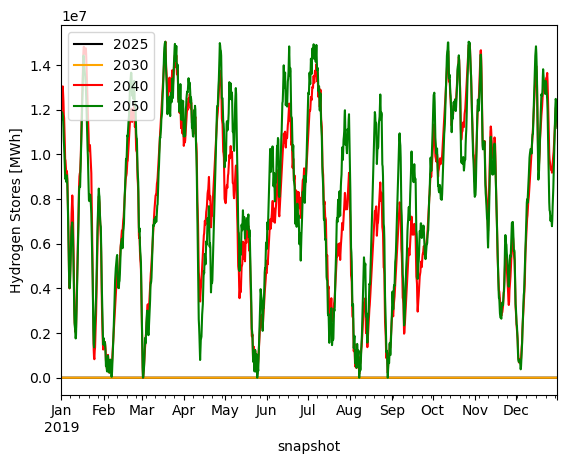

In [72]:
#finding all the H2 stores 
network = n25
hydrogen_stores = network.stores[network.stores.carrier == "H2 Store"]
# Extracting the names of the hydrogen stores
hydrogen_store_names = hydrogen_stores.index.tolist()
# Finding the capacities of the hydrogen stores
hydrogen_store_nominal_capacities = network.stores.loc[hydrogen_store_names]
maximum_nominal_capacity = hydrogen_store_nominal_capacities.e_nom_max
### a lot of hydrogen stores have infinite capacity expansion, so we need to use the storage use 
##though they all have a marginal cost, I wonder what that is about 
series2025 = network.stores_t.e.T.loc[hydrogen_store_names].T.sum(axis=1)#.plot(color = 'k', label = '2025') #what is the unit of these stores 
#plt.ylabel('Hydrogen Stores [MWh]')
#I have to assume that the unit is tonnes of hydrogen, given the fuel cell will take in hydrogen and the electrolyser will produce hydrogen, going to look in costs spreadsheet
network = n30 
hydrogen_stores = network.stores[network.stores.carrier == "H2 Store"]
hydrogen_store_names = hydrogen_stores.index.tolist()
series2030 = network.stores_t.e.T.loc[hydrogen_store_names].T.sum(axis=1)#.plot() #what is the unit of these stores 

network = n40 
hydrogen_stores = network.stores[network.stores.carrier == "H2 Store"]
hydrogen_store_names = hydrogen_stores.index.tolist()
series2040 = network.stores_t.e.T.loc[hydrogen_store_names].T.sum(axis=1)#.plot() #what is the unit of these stores 

network = n50 
hydrogen_stores = network.stores[network.stores.carrier == "H2 Store"]
hydrogen_store_names = hydrogen_stores.index.tolist()
series2050 = network.stores_t.e.T.loc[hydrogen_store_names].T.sum(axis=1)#.plot() #what is the unit of these stores 


series2025.plot(color = 'k', label = '2025')
series2030.plot(color = 'orange', label = '2030')
series2040.plot(color = 'r', label = '2040')
series2050.plot(color = 'g', label = '2050')
plt.ylabel('Hydrogen Stores [MWh]')
plt.legend()


There is a MASSIVE jump in the use of hydrogen stores between 2030 and 2040, going from an order of magnitude of 10^1 MWh to 10^7, that needs to be halted, but then the question that is coming up for me is, to WHEN are we delaying this technological use... because in this instance it is like there is almost no hydrogen until 2040

It makes sense that it coming in later ( a assume for more deep decarbonization)



looking at some of the other hydrogen related componetns
- size of the hydrogen links (going to look at planning horizon on planning horizon growth)
- use of hydrogen to transmission level buses 


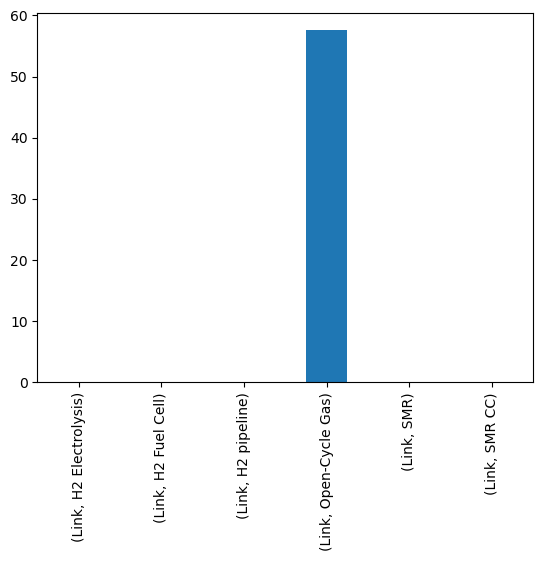

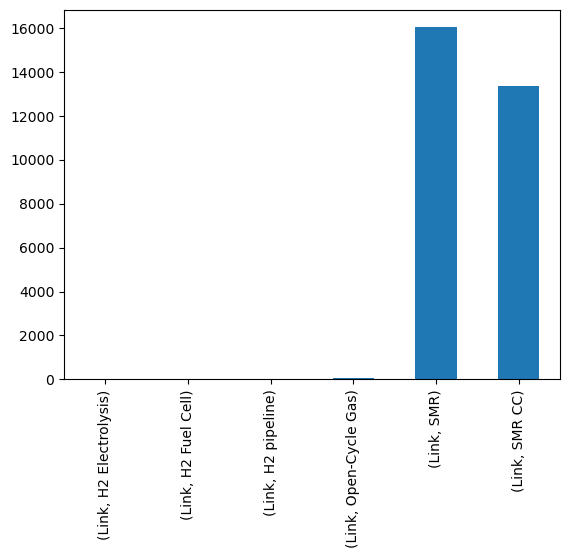

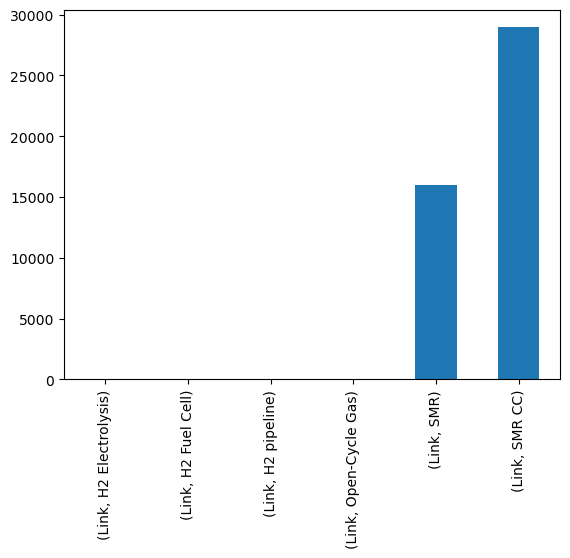

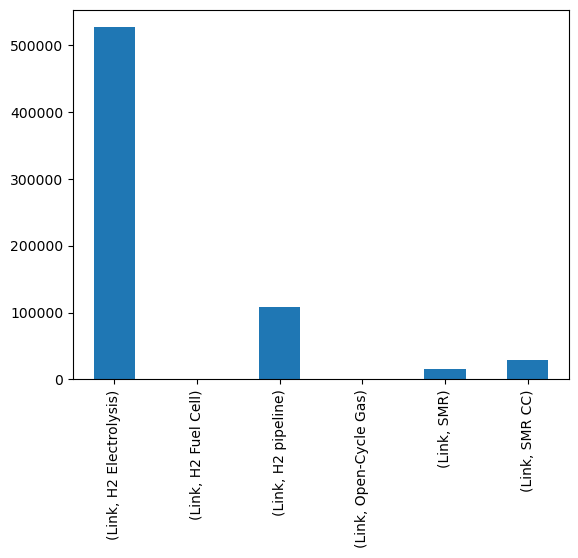

In [127]:
hydrogen_carriers = ['H2 Electrolysis', 'H2 Fuel Cell', 'SMR CC', 'SMR', 'H2 pipeline']
mask = n25.links[n25.links.carrier.isin(hydrogen_carriers)].index 
#n25.links[n25.links.carrier.isin(hydrogen_carriers)].p_nom_max.sort_values() #maximum extendable capacity of the links with hydrogen carriers 
#n25.links[n25.links.carrier.isin(hydrogen_carriers)].p_nom_min.sort_values() #starting off with 0 p_nom_min
#n25.links_t.p1.T.loc[mask] #for time series of the hydrogen links per country and per type 
#wait can I just use statistics? yes, it has all the relevant points collected for whole year analysis 
network = n25

hydrogen_statistics_mask = [
('Link', 'H2 Electrolysis'),
('Link', 'H2 Fuel Cell'),
('Link', 'H2 pipeline'),
('Link', 'Open-Cycle Gas'),
('Link', 'SMR'),
('Link', 'SMR CC'),
#('Store', 'H2 Store'),
#('Load', 'H2 for industry')
]

network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = n30
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = n40   
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = n50
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()

#the units for installed capacity is in MW, so it doesn't make sense if hydrogen stores are in MWh


In [126]:
n25.statistics.installed_capacity().attrs


{'name': 'Installed Capacity', 'unit': 'MW'}

From the graphs above, I am seeing that hydrogen stores really come into play much later, when there is a transition from OCGT --> SMR --> H2 Electrolysis and H2 needs to be stored in large quantities from 2040 onwards, (according to the hydrogen implementation and ambition gap paper, we're talking hundreds of GW by 2030 announced but not necessarily done.), so the constraint that might be the most appropriate to run is a restriction on the link capacity 

## Last week, I didn't hink that limit_max_growth was working because it didn't change the n.carriers dataframe in my study, but perhaps that is because my foresight was myopic and I need to use myopic for that max growth to be registered over multiple investment periods, going to run a myopic study with limit_max_growth and see if that causes max_growth values to occur in the n.carriers files 


In [ ]:
### Here's the Myopic test from config.sector_europe_custom_constraint_tests.yaml on June 3, without a limit on the max growth of electrolyzers or fuel cells 

In [130]:
newy_network25 = pypsa.Network(filepath_2025)
newy_network30 = pypsa.Network(filepath_2030)
newy_network40 = pypsa.Network(filepath_2040)
newy_network50 = pypsa.Network(filepath_2050)


INFO:pypsa.io:Imported network base_s_39___2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


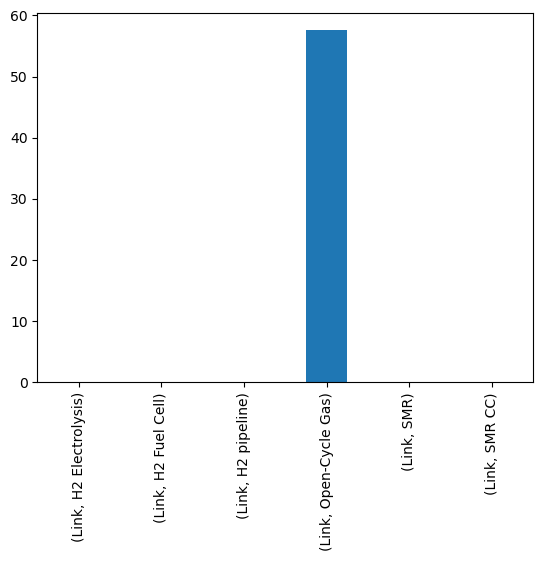

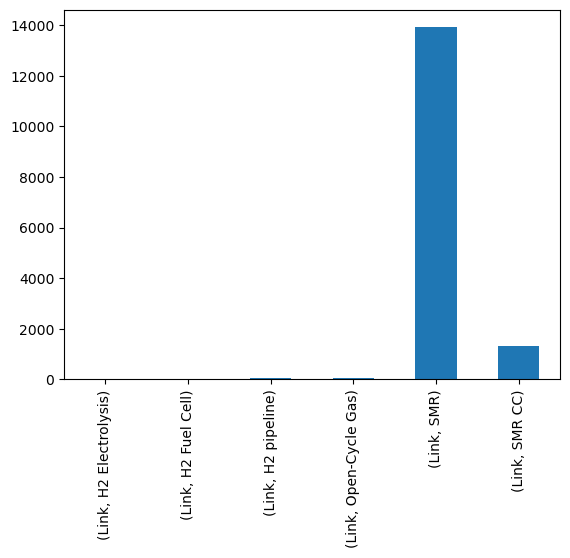

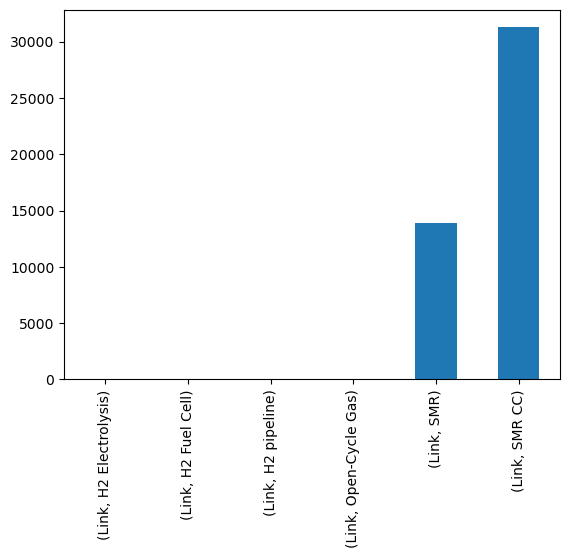

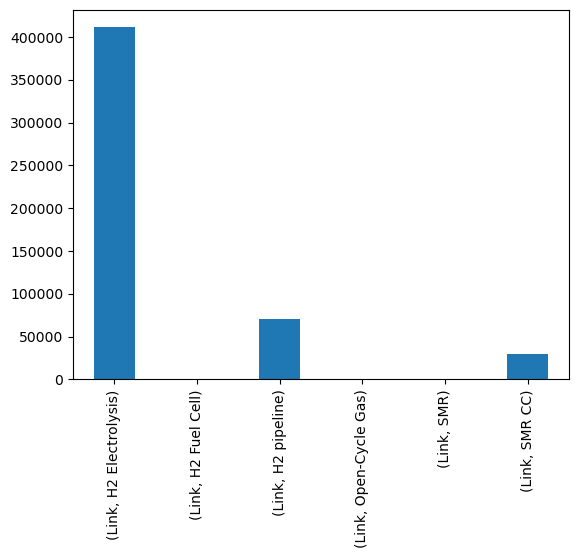

In [131]:
hydrogen_statistics_mask = [
('Link', 'H2 Electrolysis'),
('Link', 'H2 Fuel Cell'),
('Link', 'H2 pipeline'),
('Link', 'Open-Cycle Gas'),
('Link', 'SMR'),
('Link', 'SMR CC'),
#('Store', 'H2 Store'),
#('Load', 'H2 for industry')
]
network = newy_network25
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = newy_network30
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = newy_network40   
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = newy_network50
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()

#the units for installed capacity is in MW, so it doesn't make sense if hydrogen stores are in MWh


In [ ]:
### Here's the Myopic test from config.sector_europe_custom_constraint_tests.yaml on June 3, without a limit on the max growth of electrolyzers or fuel cells 

In [137]:
filepath_2020 = '/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc'
newy_network25_limited = pypsa.Network(filepath_2020)
newy_network30_limited = pypsa.Network(filepath_2030)
newy_network40_limited = pypsa.Network(filepath_2040)
newy_network50_limited = pypsa.Network(filepath_2050)



INFO:pypsa.io:Imported network base_s_39___2020.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


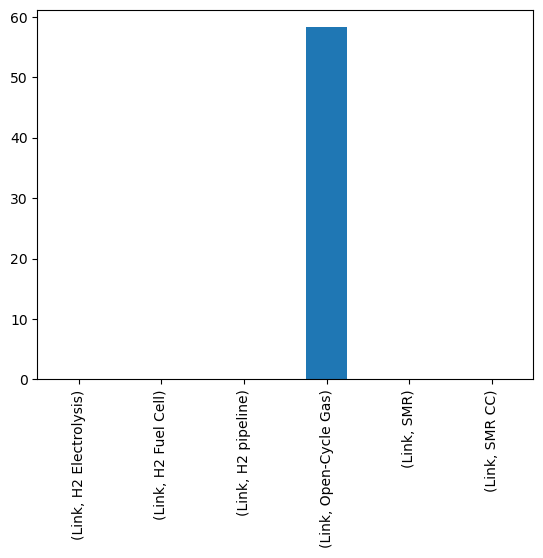

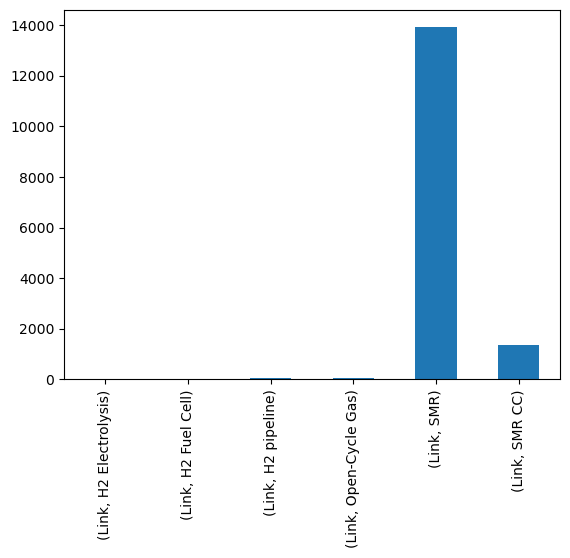

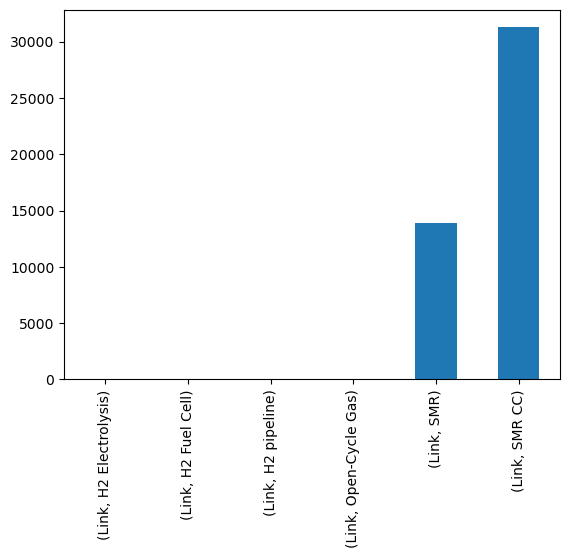

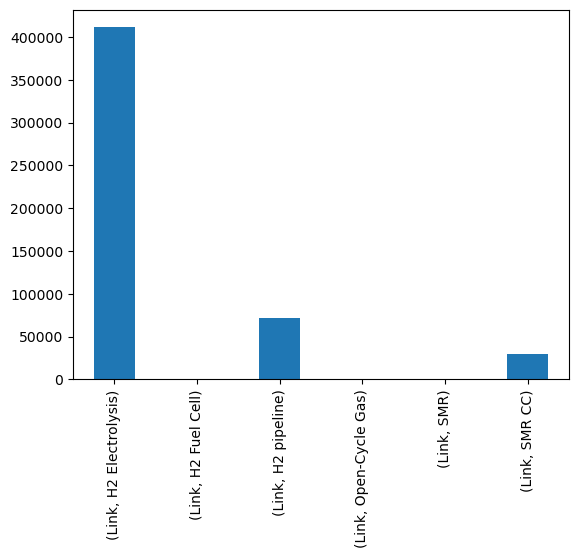

In [138]:
hydrogen_statistics_mask = [
('Link', 'H2 Electrolysis'),
('Link', 'H2 Fuel Cell'),
('Link', 'H2 pipeline'),
('Link', 'Open-Cycle Gas'),
('Link', 'SMR'),
('Link', 'SMR CC'),
#('Store', 'H2 Store'),
#('Load', 'H2 for industry')
]
network = newy_network25_limited
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = newy_network30_limited
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = newy_network40_limited   
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()
network = newy_network50_limited
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.show()

#the units for installed capacity is in MW, so it doesn't make sense if hydrogen stores are in MWh


## Using Pypsa-DE's first technology occurance function in solve_network.py and solve_myopic.smk, does this prevent SMR from being extendable until 2040? 


In [152]:
filepath_2020 = '/Users/katherine.shaw/Desktop/pypsa-eur/results/networks/base_s_39___2020.nc'
DE_function_limi2030 = pypsa.Network(filepath_2030)
DE_function_limi2040 = pypsa.Network(filepath_2040)
DE_function_limi2050 = pypsa.Network(filepath_2050)



INFO:pypsa.io:Imported network base_s_39___2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_39___2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


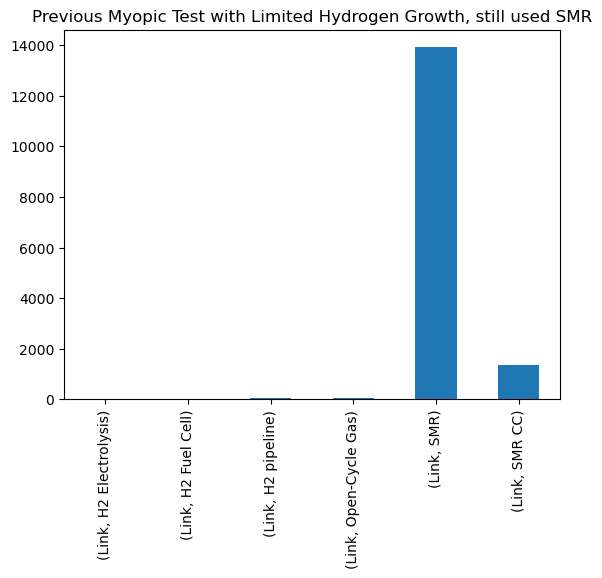

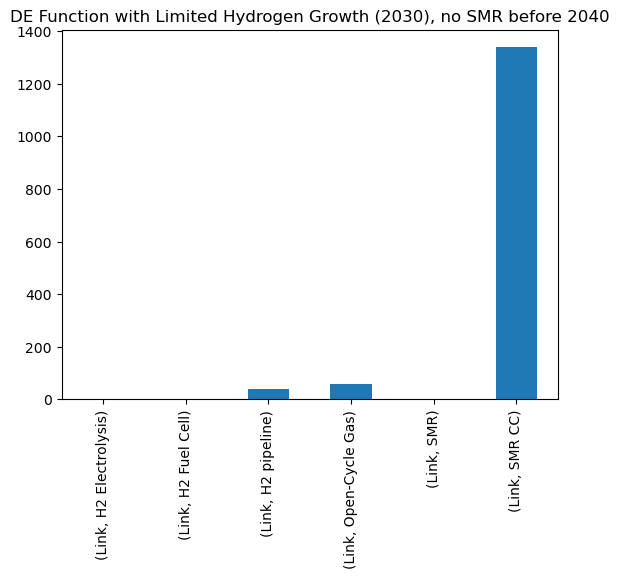

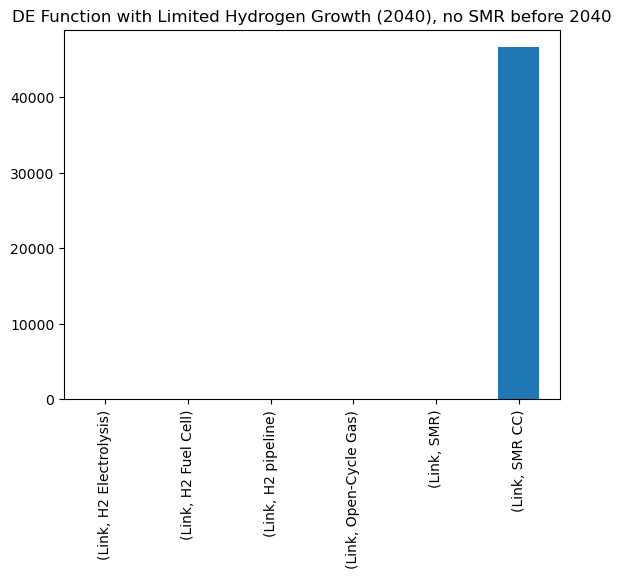

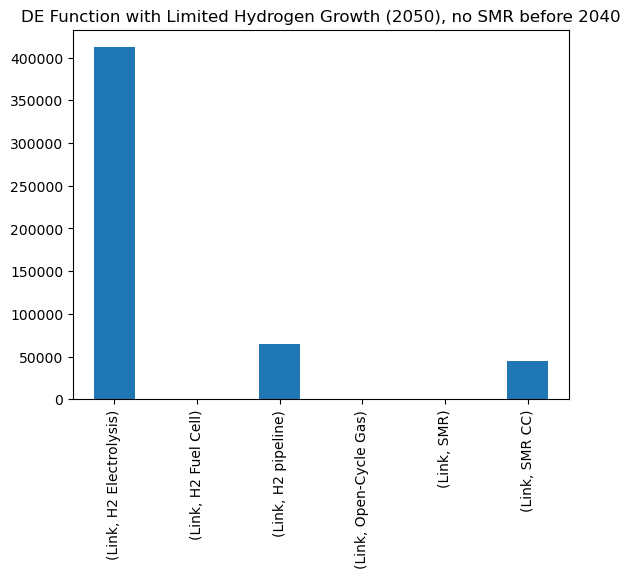

In [153]:
hydrogen_statistics_mask = [
('Link', 'H2 Electrolysis'),
('Link', 'H2 Fuel Cell'),
('Link', 'H2 pipeline'),
('Link', 'Open-Cycle Gas'),
('Link', 'SMR'),
('Link', 'SMR CC'),
#('Store', 'H2 Store'),
#('Load', 'H2 for industry')
]

network = newy_network30_limited
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.title('Previous Myopic Test with Limited Hydrogen Growth, still used SMR')
plt.show()

network = DE_function_limi2030   
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.title('DE Function with Limited Hydrogen Growth (2030), no SMR before 2040')
plt.show()

network = DE_function_limi2040   
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.title('DE Function with Limited Hydrogen Growth (2040), no SMR before 2040')
plt.show()

network = DE_function_limi2050   
network.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].plot.bar()
plt.title('DE Function with Limited Hydrogen Growth (2050), no SMR before 2040')
plt.show()

#the units for installed capacity is in MW, so it doesn't make sense if hydrogen stores are in MWh


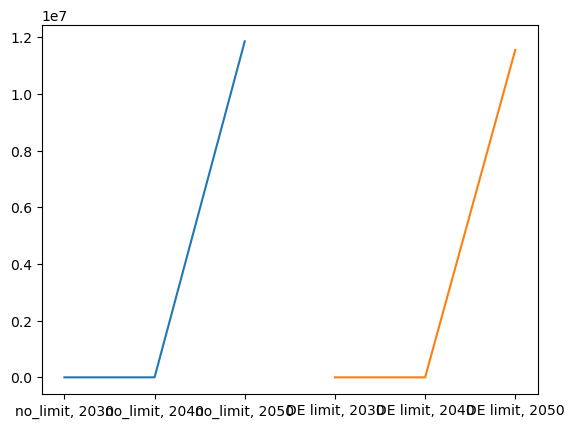

In [ ]:
#comparing the hydrogen stores installed capacity (which I assume is in MWh and thus so much higher than the links)
hydrogen_statistics_mask = [('Store', 'H2 Store')]
hydrogen_stores = ['no_limit, 2030', 'no_limit, 2040', 'no_limit, 2050']
hydrogen_stores_values = [
    newy_network30_limited.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    newy_network40_limited.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    newy_network50_limited.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0]
]
hydrogen_stores = ['no_limit, 2030', 'no_limit, 2040', 'no_limit, 2050']

hydrogen_stores_limited = ['DE limit, 2030', 'DE limit, 2040', 'DE limit, 2050']
hydrogen_stores_values_limited = [
    DE_function_limi2030.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    DE_function_limi2040.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    DE_function_limi2050.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0]
]

plt.plot(hydrogen_stores, hydrogen_stores_values) #, kind = 'bar', color='orange', label='No Limit on Hydrogen Growth')
plt.plot(hydrogen_stores_limited, hydrogen_stores_values_limited) #, kind = 'bar', color='blue', label='DE Function with Limited Hydrogen Growth')


#Stores of hydrogen are the same 

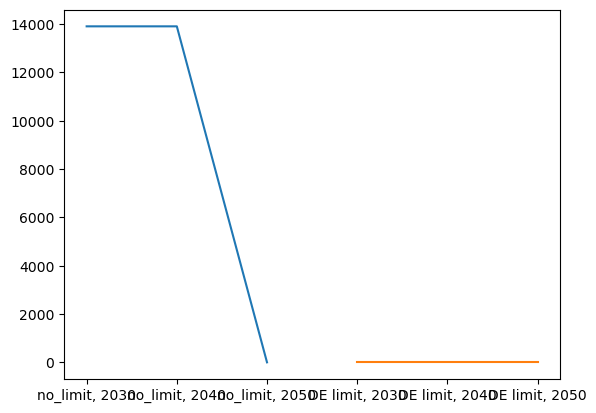

In [162]:
#comparing the hydrogen stores installed capacity (which I assume is in MWh and thus so much higher than the links)
hydrogen_statistics_mask = [('Link', 'SMR')]
hydrogen_stores = ['no_limit, 2030', 'no_limit, 2040', 'no_limit, 2050']
hydrogen_stores_values = [
    newy_network30_limited.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    newy_network40_limited.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    newy_network50_limited.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0]
]
hydrogen_stores = ['no_limit, 2030', 'no_limit, 2040', 'no_limit, 2050']

hydrogen_stores_limited = ['DE limit, 2030', 'DE limit, 2040', 'DE limit, 2050']
hydrogen_stores_values_limited = [
    DE_function_limi2030.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    DE_function_limi2040.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0],
    DE_function_limi2050.statistics()['Installed Capacity'].loc[hydrogen_statistics_mask].values[0]
]

plt.plot(hydrogen_stores, hydrogen_stores_values) #, kind = 'bar', color='orange', label='No Limit on Hydrogen Growth')
plt.plot(hydrogen_stores_limited, hydrogen_stores_values_limited) #, kind = 'bar', color='blue', label='DE Function with Limited Hydrogen Growth')



### Tests with all hydrogen technologies delayed until 2030, then 2040
June 4 
This will be everything in hydrogen mask 

hydrogen_statistics_mask = [
('Link', 'H2 Electrolysis'),
('Link', 'H2 Fuel Cell'),
('Link', 'H2 pipeline'),
('Link', 'Open-Cycle Gas'),
('Link', 'SMR'),
('Link', 'SMR CC'),
#('Store', 'H2 Store'),
#('Load', 'H2 for industry')
]

In [165]:
newy_network25.links[newy_network25.links.carrier == 'H2 pipeline']

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,location,underground,voltage,reversed,length_original,project_status,tags,geometry,dc,under_construction
Link,,,,,,,,,,,,,,,,,,,,,
H2 pipeline AL0 0 -> GR0 0-2025,AL0 0 H2,GR0 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,False,545.224403,,,,NaN,NaN
H2 pipeline AL0 0 -> IT0 0-2025,AL0 0 H2,IT0 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,False,645.251580,,,,NaN,NaN
H2 pipeline AL0 0 -> ME0 0-2025,AL0 0 H2,ME0 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,False,154.405445,,,,NaN,NaN
H2 pipeline AL0 0 -> MK0 0-2025,AL0 0 H2,MK0 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,False,146.659231,,,,NaN,NaN
H2 pipeline AL0 0 -> XK0 0-2025,AL0 0 H2,XK0 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,False,151.201011,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H2 pipeline NO1 0 -> SE1 0-reversed-2025,SE1 0 H2,NO1 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,True,387.104044,,,,NaN,NaN
H2 pipeline PL0 0 -> SE1 0-reversed-2025,SE1 0 H2,PL0 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,True,1015.024496,,,,NaN,NaN
H2 pipeline PL0 0 -> SK0 0-reversed-2025,SK0 0 H2,PL0 0 H2,,H2 pipeline,1.0,True,2025,50.0,0.0,0.0,...,,NaN,NaN,True,340.354361,,,,NaN,NaN


## Auxillary Functions 

In [14]:
#Packages 
import pypsa
import matplotlib.pyplot as plt 
import cartopy 
import geopandas
import networkx
import linopy
import cartopy.crs as ccrs
import atlite 
import geopandas as gpd 
import xarray
import pandas as pd 
from datetime import datetime
import numpy as np
from pypsa.plot import add_legend_patches
import random

## Overall view of colors matched to carriers 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

/var/folders/_w/ry357l9n0vjg8jgfczvkpk3r0000gn/T/ipykernel_17224/452590517.py:311: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



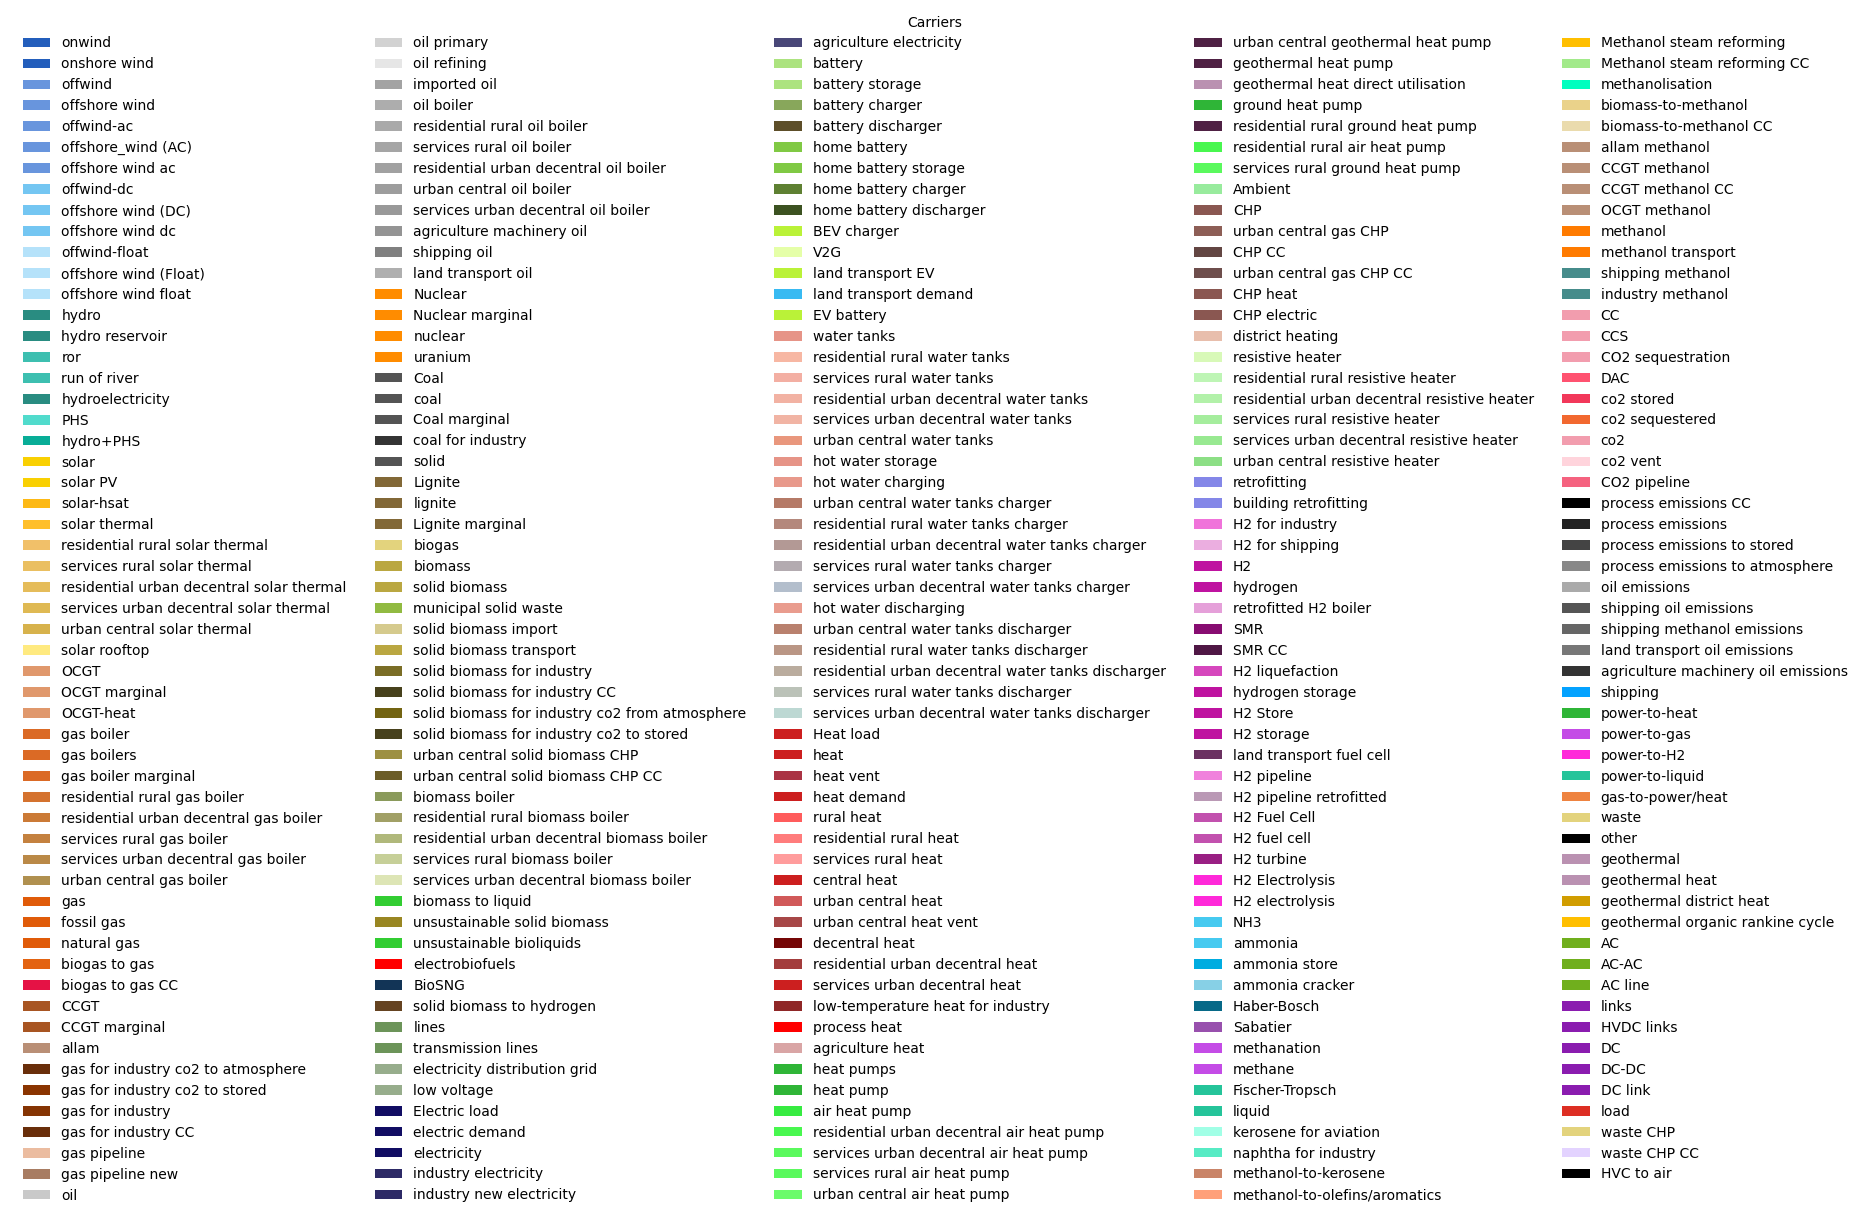

In [3]:
# colors associated with each carrier for graphing/plotting consistently across network runs or different datasets
tech_colors = {
    'onwind': "#235ebc",
    'onshore wind': "#235ebc",
    'offwind': "#6895dd",
    'offshore wind': "#6895dd",
    'offwind-ac': "#6895dd",
    'offshore_wind (AC)': "#6895dd",
    'offshore wind ac': "#6895dd",
    'offwind-dc': "#74c6f2",
    'offshore wind (DC)': "#74c6f2",
    'offshore wind dc': "#74c6f2",
    'offwind-float': "#b5e2fa",
    'offshore wind (Float)': "#b5e2fa",
    'offshore wind float': "#b5e2fa",
    'hydro': '#298c81',
    'hydro reservoir': '#298c81',
    'ror': '#3dbfb0',
    'run of river': '#3dbfb0',
    'hydroelectricity': '#298c81',
    'PHS': '#51dbcc',
    'hydro+PHS': "#08ad97",
    'solar': "#f9d002",
    'solar PV': "#f9d002",
    'solar-hsat': "#fdb915",
    'solar thermal': '#ffbf2b',
    'residential rural solar thermal': '#f1c069',
    'services rural solar thermal': '#eabf61',
    'residential urban decentral solar thermal': '#e5bc5a',
    'services urban decentral solar thermal': '#dfb953',
    'urban central solar thermal': '#d7b24c',
    'solar rooftop': '#ffea80',
    'OCGT': '#e0986c',
    'OCGT marginal': '#e0986c',
    'OCGT-heat': '#e0986c',
    'gas boiler': '#db6a25',
    'gas boilers': '#db6a25',
    'gas boiler marginal': '#db6a25',
    'residential rural gas boiler': '#d4722e',
    'residential urban decentral gas boiler': '#cb7a36',
    'services rural gas boiler': '#c4813f',
    'services urban decentral gas boiler': '#ba8947',
    'urban central gas boiler': '#b0904f',
    'gas': '#e05b09',
    'fossil gas': '#e05b09',
    'natural gas': '#e05b09',
    'biogas to gas': '#e36311',
    'biogas to gas CC': '#e51245',
    'CCGT': '#a85522',
    'CCGT marginal': '#a85522',
    'allam': '#B98F76',
    'gas for industry co2 to atmosphere': '#692e0a',
    'gas for industry co2 to stored': '#8a3400',
    'gas for industry': '#853403',
    'gas for industry CC': '#692e0a',
    'gas pipeline': '#ebbca0',
    'gas pipeline new': '#a87c62',
    'oil': '#c9c9c9',
    'oil primary': '#d2d2d2',
    'oil refining': '#e6e6e6',
    'imported oil': '#a3a3a3',
    'oil boiler': '#adadad',
    'residential rural oil boiler': '#a9a9a9',
    'services rural oil boiler': '#a5a5a5',
    'residential urban decentral oil boiler': '#a1a1a1',
    'urban central oil boiler': '#9d9d9d',
    'services urban decentral oil boiler': '#999999',
    'agriculture machinery oil': '#949494',
    'shipping oil': "#808080",
    'land transport oil': '#afafaf',
    'Nuclear': '#ff8c00',
    'Nuclear marginal': '#ff8c00',
    'nuclear': '#ff8c00',
    'uranium': '#ff8c00',
    'Coal': '#545454',
    'coal': '#545454',
    'Coal marginal': '#545454',
    'coal for industry': '#343434',
    'solid': '#545454',
    'Lignite': '#826837',
    'lignite': '#826837',
    'Lignite marginal': '#826837',
    'biogas': '#e3d37d',
    'biomass': '#baa741',
    'solid biomass': '#baa741',
    'municipal solid waste': '#91ba41',
    'solid biomass import': '#d5ca8d',
    'solid biomass transport': '#baa741',
    'solid biomass for industry': '#7a6d26',
    'solid biomass for industry CC': '#47411c',
    'solid biomass for industry co2 from atmosphere': '#736412',
    'solid biomass for industry co2 to stored': '#47411c',
    'urban central solid biomass CHP': '#9d9042',
    'urban central solid biomass CHP CC': '#6c5d28',
    'biomass boiler': '#8A9A5B',
    'residential rural biomass boiler': '#a1a066',
    'residential urban decentral biomass boiler': '#b0b87b',
    'services rural biomass boiler': '#c6cf98',
    'services urban decentral biomass boiler': '#dde5b5',
    'biomass to liquid': '#32CD32',
    'unsustainable solid biomass': '#998622',
    'unsustainable bioliquids': '#32CD32',
    'electrobiofuels': '#FF0000',
    'BioSNG': '#123456',
    'solid biomass to hydrogen': '#654321',
    'lines': '#6c9459',
    'transmission lines': '#6c9459',
    'electricity distribution grid': '#97ad8c',
    'low voltage': '#97ad8c',
    'Electric load': '#110d63',
    'electric demand': '#110d63',
    'electricity': '#110d63',
    'industry electricity': '#2d2a66',
    'industry new electricity': '#2d2a66',
    'agriculture electricity': '#494778',
    'battery': '#ace37f',
    'battery storage': '#ace37f',
    'battery charger': '#88a75b',
    'battery discharger': '#5d4e29',
    'home battery': '#80c944',
    'home battery storage': '#80c944',
    'home battery charger': '#5e8032',
    'home battery discharger': '#3c5221',
    'BEV charger': '#baf238',
    'V2G': '#e5ffa8',
    'land transport EV': '#baf238',
    'land transport demand': '#38baf2',
    'EV battery': '#baf238',
    'water tanks': '#e69487',
    'residential rural water tanks': '#f7b7a3',
    'services rural water tanks': '#f3afa3',
    'residential urban decentral water tanks': '#f2b2a3',
    'services urban decentral water tanks': '#f1b4a4',
    'urban central water tanks': '#e9977d',
    'hot water storage': '#e69487',
    'hot water charging': '#e8998b',
    'urban central water tanks charger': '#b57a67',
    'residential rural water tanks charger': '#b4887c',
    'residential urban decentral water tanks charger': '#b39995',
    'services rural water tanks charger': '#b3abb0',
    'services urban decentral water tanks charger': '#b3becc',
    'hot water discharging': '#e99c8e',
    'urban central water tanks discharger': '#b9816e',
    'residential rural water tanks discharger': '#ba9685',
    'residential urban decentral water tanks discharger': '#baac9e',
    'services rural water tanks discharger': '#bbc2b8',
    'services urban decentral water tanks discharger': '#bdd8d3',
    'Heat load': '#cc1f1f',
    'heat': '#cc1f1f',
    'heat vent': '#aa3344',
    'heat demand': '#cc1f1f',
    'rural heat': '#ff5c5c',
    'residential rural heat': '#ff7c7c',
    'services rural heat': '#ff9c9c',
    'central heat': '#cc1f1f',
    'urban central heat': '#d15959',
    'urban central heat vent': '#a74747',
    'decentral heat': '#750606',
    'residential urban decentral heat': '#a33c3c',
    'services urban decentral heat': '#cc1f1f',
    'low-temperature heat for industry': '#8f2727',
    'process heat': '#ff0000',
    'agriculture heat': '#d9a5a5',
    'heat pumps': '#2fb537',
    'heat pump': '#2fb537',
    'air heat pump': '#36eb41',
    'residential urban decentral air heat pump': '#48f74f',
    'services urban decentral air heat pump': '#5af95d',
    'services rural air heat pump': '#5af95d',
    'urban central air heat pump': '#6cfb6b',
    'urban central geothermal heat pump': '#4f2144',
    'geothermal heat pump': '#4f2144',
    'geothermal heat direct utilisation': '#ba91b1',
    'ground heat pump': '#2fb537',
    'residential rural ground heat pump': '#4f2144',
    'residential rural air heat pump': '#48f74f',
    'services rural ground heat pump': '#5af95d',
    'Ambient': '#98eb9d',
    'CHP': '#8a5751',
    'urban central gas CHP': '#8d5e56',
    'CHP CC': '#634643',
    'urban central gas CHP CC': '#6e4e4c',
    'CHP heat': '#8a5751',
    'CHP electric': '#8a5751',
    'district heating': '#e8beac',
    'resistive heater': '#d8f9b8',
    'residential rural resistive heater': '#bef5b5',
    'residential urban decentral resistive heater': '#b2f1a9',
    'services rural resistive heater': '#a5ed9d',
    'services urban decentral resistive heater': '#98e991',
    'urban central resistive heater': '#8cdf85',
    'retrofitting': '#8487e8',
    'building retrofitting': '#8487e8',
    'H2 for industry': "#f073da",
    'H2 for shipping': "#ebaee0",
    'H2': '#bf13a0',
    'hydrogen': '#bf13a0',
    'retrofitted H2 boiler': '#e5a0d9',
    'SMR': '#870c71',
    'SMR CC': '#4f1745',
    'H2 liquefaction': '#d647bd',
    'hydrogen storage': '#bf13a0',
    'H2 Store': '#bf13a0',
    'H2 storage': '#bf13a0',
    'land transport fuel cell': '#6b3161',
    'H2 pipeline': '#f081dc',
    'H2 pipeline retrofitted': '#ba99b5',
    'H2 Fuel Cell': '#c251ae',
    'H2 fuel cell': '#c251ae',
    'H2 turbine': '#991f83',
    'H2 Electrolysis': '#ff29d9',
    'H2 electrolysis': '#ff29d9',
    'NH3': '#46caf0',
    'ammonia': '#46caf0',
    'ammonia store': '#00ace0',
    'ammonia cracker': '#87d0e6',
    'Haber-Bosch': '#076987',
    'Sabatier': '#9850ad',
    'methanation': '#c44ce6',
    'methane': '#c44ce6',
    'Fischer-Tropsch': '#25c49a',
    'liquid': '#25c49a',
    'kerosene for aviation': '#a1ffe6',
    'naphtha for industry': '#57ebc4',
    'methanol-to-kerosene': '#C98468',
    'methanol-to-olefins/aromatics': '#FFA07A',
    'Methanol steam reforming': '#FFBF00',
    'Methanol steam reforming CC': '#A2EA8A',
    'methanolisation': '#00FFBF',
    'biomass-to-methanol': '#EAD28A',
    'biomass-to-methanol CC': '#EADBAD',
    'allam methanol': '#B98F76',
    'CCGT methanol': '#B98F76',
    'CCGT methanol CC': '#B98F76',
    'OCGT methanol': '#B98F76',
    'methanol': '#FF7B00',
    'methanol transport': '#FF7B00',
    'shipping methanol': '#468c8b',
    'industry methanol': '#468c8b',
    'CC': '#f29dae',
    'CCS': '#f29dae',
    'CO2 sequestration': '#f29dae',
    'DAC': '#ff5270',
    'co2 stored': '#f2385a',
    'co2 sequestered': '#f2682f',
    'co2': '#f29dae',
    'co2 vent': '#ffd4dc',
    'CO2 pipeline': '#f5627f',
    'process emissions CC': '#000000',
    'process emissions': '#222222',
    'process emissions to stored': '#444444',
    'process emissions to atmosphere': '#888888',
    'oil emissions': '#aaaaaa',
    'shipping oil emissions': "#555555",
    'shipping methanol emissions': '#666666',
    'land transport oil emissions': '#777777',
    'agriculture machinery oil emissions': '#333333',
    'shipping': '#03a2ff',
    'power-to-heat': '#2fb537',
    'power-to-gas': '#c44ce6',
    'power-to-H2': '#ff29d9',
    'power-to-liquid': '#25c49a',
    'gas-to-power/heat': '#ee8340',
    'waste': '#e3d37d',
    'other': '#000000',
    'geothermal': '#ba91b1',
    'geothermal heat': '#ba91b1',
    'geothermal district heat': '#d19D00',
    'geothermal organic rankine cycle': '#ffbf00',
    'AC': "#70af1d",
    'AC-AC': "#70af1d",
    'AC line': "#70af1d",
    'links': "#8a1caf",
    'HVDC links': "#8a1caf",
    'DC': "#8a1caf",
    'DC-DC': "#8a1caf",
    'DC link': "#8a1caf",
    'load': "#dd2e23",
    'waste CHP': '#e3d37d',
    'waste CHP CC': '#e3d3ff',
    'HVC to air': '#000000',
}


## Function that converts color format for later plotting
def hex_to_rgba(hex_color, alpha=1.0):
    """Convert hex color to normalized RGBA tuple (0-1 values)."""
    hex_color = hex_color.lstrip('#')
    if len(hex_color) == 6:
        rgb = tuple(int(hex_color[i:i+2], 16)/255 for i in (0, 2, 4))
        return (*rgb, alpha)
    raise ValueError(f"Invalid hex color: {hex_color}")

# Create legend handles from the dictionary
legend_handles = [Patch(facecolor=color, label=carrier) for carrier, color in tech_colors.items()]

# Create a blank figure just for the legend (or attach to an existing one)
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('off')  # hide the axes

# Add the legend
ax.legend(
    handles=legend_handles,
    title="Carriers",
    loc="center left",
    frameon=False,
    bbox_to_anchor=(0, 0.5),
    ncols = 5,
)

plt.tight_layout()
plt.show()

In [4]:
#This function shows all the attachments to a particular bus in a network
#It is very useful for seeing how one component connects to other sequentially
def bus_connections(network, bus_name): 
    connected_generators = network.generators[network.generators.bus == bus_name]
    connected_loads = network.loads[network.loads.bus == bus_name]
    connected_storage_units = network.storage_units[network.storage_units.bus == bus_name]
    connected_links_in = network.links[network.links.bus1 == bus_name]
    connected_links_out = network.links[network.links.bus0 == bus_name]
    connected_lines = network.lines[(network.lines.bus0 == bus_name) | (network.lines.bus1 == bus_name)]
    connected_transformers = network.transformers[(network.transformers.bus0 == bus_name) | (network.transformers.bus1 == bus_name)]
    connected_stores = network.stores[network.stores.bus == bus_name]

    if bus_name in network.buses.index.values:
        if any(connected_generators.index.values):
            print("The generators connected to this bus are:    " + str(connected_generators.index.values))
        if any(connected_loads.index.values):
            print("The loads connected to this bus are:     " + str(connected_loads.index.values))
        if any(connected_storage_units.index.values):
            print("The storage units connected to this bus are:   " + str(connected_storage_units.index.values))
        if any(connected_stores.index.values):
            print("The stores connected to this bus are:   " + str(connected_stores.index.values))
        if any(connected_links_in.index.values):
            print("The incoming links to this bus are from the bus:  " +  str(connected_links_in.bus0.values))
        if any(connected_links_out.index.values):
            print("The outgoing links from this bus are to the bus:  " +  str(connected_links_out.bus1.values))
        if any(connected_lines.index.values):
            print("The lines connected to this bus are connected to:   "  + str(connected_lines.bus1.values))
        if any(connected_transformers.index.values):
            print(connected_transformers.index.values)
        return None    
    else:      
        return str("This bus does not exist in the network") 

In [5]:
#this function aids the demand function seperate the different types of demand (by carrier)
def load_dataframe_compiler(network, sector_suffix): #this still returns load dataframes in terms of power dispatch, not in total energy (so MW, not MWH)
    import pandas as pd
    import numpy as np

    # Create a dummy dataframe with load dispatch
    df = pd.DataFrame(network.loads_t.p.T.copy())

    # All loads and their static information 
    df_loads = network.loads.copy()
    carrier_options = df_loads.carrier.unique()

    # Prepare suffix list and remap 'electricity' to empty string
    suffixes = carrier_options.copy()
    if 'electricity' in suffixes:
        suffixes[np.where(suffixes == 'electricity')[0][0]] = ''

    # Check that the given sector_suffix is valid
    if sector_suffix not in suffixes:
        print('network suffix not in suffix list')
        return None

    # Filtering logic
    if sector_suffix == '':
        # Keep only rows where the index suffix after first 5 chars is exactly ''
        filtered_df = df[df.index.str[5:] == ''].copy()
    else:
        # Match any index containing the suffix
        filtered_df = df[df.index.str.contains(sector_suffix, regex=False)].copy()

    return filtered_df
#tested this to make sure that it capture all the loads 
#but for example luxembourg had a negative load dispatch? 

In [6]:
#bus_connections(n_test, 'GB2 0 low voltage') #home battery and EV battery buses are prurely stores
#there are no loads connected to the transmission level country bus
#so really, to see what is satisfying the electric demands, I have to account for every link incoming to the low voltage stores and every generator
#the only incoming links are from country level and home battery level, but lots of different types of things connect to home battery level
#just looking at dispatch....
#regarding the loads, the only electric (aka non-material load) NOT connected to the low voltage bus is the EV load, which is connected to the EV bus which is connected to the low voltage bus
#so the question becomes, to I take all generation from generators connected to the AC buses, which may include electricty from renewables attached to the [country]0 bus but not used by the doemestic load
#I.E., some may be used to electrolyze water into hydrogen...
#I mean likewise some of the electricity that makes its way through low voltage, don't have a way to really track where that goes...
#So it's decided, generators attached to "any bus that has units of MWh_el"
def carrier_totals_sector(network, sector_option):
    #sector option, i.e. -- what form is the energy in before it gets used by a load? 
    #options include: electric, gas -- but this gas must be gas that does not go to the [country]0 buses, 
    # heating (I am guessing here that there are not generators attached to the heating buses, only links, so can use links as a proxy for generation (arrived power/efficiency == original generation))

    #getting all generation in terms of MWh
    carrier_totals_year = network.generators_t.p.T.groupby([network.generators.carrier, network.generators.bus]).sum().copy()
    carrier_totals_year = carrier_totals_year * network.snapshot_weightings.objective[0]

    #filtering if you want all generation making it's way to the low voltage network, where the residential, agricultural electricity, industrial electricity, and one connection away from EV battery 
    if sector_option == 'electric':
        bus_filter = network.buses[network.buses.unit == 'MWh_el'].index
        mask1 = carrier_totals_year.index.get_level_values(1).isin(bus_filter)

        carrier_totals_year_filtered = carrier_totals_year[carrier_totals_year.index.get_level_values(1).isin(bus_filter)] #in Mwh
        carrier_totals_year_filtered = carrier_totals_year_filtered.sum(axis=1)
        carrier_totals_year_filtered = carrier_totals_year_filtered.groupby('carrier').sum()
        #for all generation that comes from links from conventional carriers
        link_addition = network.links_t.p1.T.groupby([network.links.carrier, network.links.bus1]).sum().copy() * network.snapshot_weightings.objective[0] #end of the link, so it's in MWh electric 
        link_addition = link_addition[link_addition.index.get_level_values(1).isin(bus_filter)]
        carrier_filter = ['coal', 'lignite', 'CCGT', 'OCGT'] #additional bus filter for links to limit to conventional generators
        link_addition = link_addition[link_addition.index.get_level_values(0).isin(carrier_filter) ]
        link_addition = - link_addition.groupby('carrier').sum()
        link_addition = link_addition.sum(axis=1)
        carrier_totals_year_filtered = pd.concat([carrier_totals_year_filtered, link_addition])\
        
    #what are all the links going from a conventional generator to the low voltage loads?
    #n_test.links[n_test.links.bus0 == 'EU lignite']
    #n_test.links[n_test.links.bus0 == 'AL0 0']
    #ugh, no way to disentangle coal or lignite from each other in the al0 to al0 0 low voltage grid, have to say how much is transmitted to the AC level (but that's true for every generator except solar rooftop)
    # still saying, how much MWh_el did you get from coal... it's just that that Mwh_el might be going to the battery, low voltage, or H3

    return carrier_totals_year_filtered



In [7]:
def Entso_data():
    #creating entsoe data for all the countries and arranging them into a multi-indexed series for coparison with network
    #the current csv filepath leads to the 2019 entos historical generation data saved on my local machine 
    ## Buildig in the ENTSO data 
    Entso_generation_2019 = pd.read_csv('/Users/katherine.shaw/Desktop/Data Copies /2019_ENTSO-E_Stats/historical_electricity_production.csv')
    Entso_generation_2019 = Entso_generation_2019.set_index(Entso_generation_2019['Unnamed: 0'], drop = True)
    Entso_generation_2019

    countries = ['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'XK']
    Entso_generation_2019_dictionary = dict.fromkeys(countries, 0)  # All keys have value 0
    Entso_generation_2019_dictionary 

    for i in countries:
        country_choice = i 
        # Filter columns that start with the prefix
        filtered_df = Entso_generation_2019[[col for col in Entso_generation_2019.columns if col.startswith(country_choice)]] #filters to just one country by the first two letters of the country code
        filtered_df = filtered_df.drop(filtered_df.index[-1]) #sum of all the rows except the first , as the first gives the carrier
        filtered_df

    #creating the carrier index from the colum names  
        column_list = filtered_df.iloc[0].tolist()
        column_list
    #setting the country as the title of the dictionary? 
        new_dict = dict.fromkeys(column_list, 0)  # All keys have value 0

        if not column_list:
            Entso_generation_2019_dictionary[country_choice] = new_dict
        else: 
            for i in column_list:
             #finding the sum of the column from the original dataframe, 
                carrier_choice = i 
                matching_cols = filtered_df.columns[filtered_df.iloc[0] == carrier_choice]
                gen_column = filtered_df[matching_cols].iloc[1:-1] #this basically turned it into a series
                gen_column = gen_column.astype(float)
                carrier_year_value = gen_column.sum()
                new_dict[carrier_choice] = carrier_year_value.item()
                Entso_generation_2019_dictionary[country_choice] = new_dict
        Entso_generation_2019_dictionary #This is in MWh over the course of the full year 


    series = pd.Series(Entso_generation_2019_dictionary)
    

    # Flatten into a MultiIndex Series
    multi_index_series = pd.Series({(outer, inner): val for outer, inner_dict in series.items() for inner, val in inner_dict.items()})
    multi_index_series

    #The Entso-E data sorted into a multi-level index and then grouped by carrier
    multi_index_series.groupby(level = 1).sum().sort_values(ascending=True)
    multi_index_series.index = pd.MultiIndex.from_tuples(
        [(str(i).lower(), str(j).lower()) for i, j in multi_index_series.index]
    )
    year_Entso_E_series_totals = multi_index_series.groupby(level = 1).sum().sort_values(ascending=True).copy()
    year_Entso_E_series_totals

    #changing the index names to match with the names generated by the pypsa model
    #run of river
    year_Entso_E_series_totals['ror'] = year_Entso_E_series_totals['run of river']
    year_Entso_E_series_totals = year_Entso_E_series_totals.drop('run of river')
    #onshore wind 
    year_Entso_E_series_totals['onwind'] = year_Entso_E_series_totals['onshore wind']
    year_Entso_E_series_totals = year_Entso_E_series_totals.drop('onshore wind')
    year_Entso_E_series_totals
    #offshore wind 
    year_Entso_E_series_totals['offwind'] = year_Entso_E_series_totals['offshore wind']
    year_Entso_E_series_totals = year_Entso_E_series_totals.drop('offshore wind')
    
    #biomass 
    year_Entso_E_series_totals['solid biomass'] = year_Entso_E_series_totals['biomass']
    year_Entso_E_series_totals = year_Entso_E_series_totals.drop('biomass')
    #


    return year_Entso_E_series_totals

In [9]:
def Entso_comparison(network, year): 

    #loading pypsa series and changing into the same index names as enstoe e
    AC_carrier_year = carrier_totals_sector(network, 'electric')
    AC_carrier_year['offwind'] = AC_carrier_year['offwind-ac'] + AC_carrier_year['offwind-dc'] + AC_carrier_year['offwind-float']
    AC_carrier_year = AC_carrier_year.drop(['offwind-ac', 'offwind-dc', 'offwind-float'])
    AC_carrier_year['gas'] = AC_carrier_year['CCGT'] + AC_carrier_year['OCGT']
    AC_carrier_year = AC_carrier_year.drop(['CCGT', 'OCGT'])
    

    #Getting entso series 
    year_Entso_E_series_totals = Entso_data()
    
    ######## Making comparison dataframe ######

    ## Establishing dataframe 
    comparison_dataframe = pd.DataFrame()

    comparison_dataframe['PyPSA Generation By Carrier'] = AC_carrier_year 
    comparison_dataframe['Entso-E Generation totals 2019'] = year_Entso_E_series_totals
    ## delta between the two, 
    comparison_dataframe['delta'] = comparison_dataframe['PyPSA Generation By Carrier'] - comparison_dataframe['Entso-E Generation totals 2019']

    # Plot the horizontal bar chart
    fig, ax = plt.subplots(figsize=(8, 4))
    comparison_dataframe['Entso-E Generation totals 2019'].plot.barh(color = 'navajowhite', label = 'Entso_generation_2019', position = 0.5, )

    pypsa_bars = comparison_dataframe['PyPSA Generation By Carrier'].plot.barh(color = 'blue', label = 'Pypsa Generation by Carrier 2019', position = 0.5, alpha = 0.5)
    # Add labels to PyPSA bars
    for i, (value, label) in enumerate(zip(comparison_dataframe['PyPSA Generation By Carrier'], 
                                         comparison_dataframe['delta'])):
     ax.text(
        value + 1e7,
        i + 0.2,  # shift down slightly to match bar position
        f"{label:.2e}",
        va='center',
        fontsize=10,
        color='black',
        clip_on=False
    )

    # Optional: extend x-axis limit so labels aren't cut off
    ax.set_xlim(right= 1.5e9)


    plt.title('Comparison along like carriers from the ENTSO-E Transparency Platform and the solved network, 2019 year')
    plt.legend()
    plt.xlabel('MWh')
    plt.tight_layout()

    plt.show()

    return comparison_dataframe



In [10]:
#Create an output of statistics for the model
def model_statistics(n):
    #Total Cost
    system_cost = "{:e}".format(n.objective)
    print('The total system cost as defined by the objective function is :   ')
    print(str(system_cost) + '  EUR')
    print()

    #number of nodes 
    print('The number of nodes is :'  + str(len(n.buses[n.buses['carrier'] == 'AC'])))  
    print()

    print('The carriers with CO2 emissions registered by the model are :  ')
    n_carriers_c02 = n.carriers[n.carriers['co2_emissions'] != 0.0000]
    print(n_carriers_c02.index.values)
    print()
    print('Answer the question: are all the conventional carriers associated with a non-zero carrier carbon emission values?')
    print()
    #The total amount of line length 
    print("The total length of AC lines and DC links in the model is:")
    DC_links = n.links[n.links.carrier == 'DC']
    print(str((n.lines.length.sum() + DC_links.length.sum())) + '  km')
    print()
    
    #the amount of energy curtailed in the model 
    print()
    print('The amount of energy curtailed in the model by carrier is : ')
    print(n.statistics.curtailment())
    print()
    print('Therefore the total amount curtailed is  : ' + str("{:e}".format(n.statistics.curtailment().sum())) + '   MWh per year')
    print()

    #emissions generated in the model

    carbon_emissions1 = carbon_emissions(n)[0]
    print('The carbon emissions registered by the model from generator are ' + str("{:e}".format(carbon_emissions1.sum())) +  '   tonnes CO2 per year')
    carbon_emissions2 = carbon_emissions(n)[1]
    print('The carbon emissions registered by the model in the co2_atmosphere store  ' + str("{:e}".format(-carbon_emissions2)) + '   tonnes CO2')
    print()
 

    #Generators in the model 
    generator_carriers = n.generators.carrier.unique()
    print('The generators types included in this model are :  ')
    print(generator_carriers)
    print()

    #Carriers in the model 
    carrier_types = n.carriers.head(50)
    print('The carriers included in this model are :   ')
    print(n.carriers.index.values)
    print()

    #The demand across the sectors
    n.loads_t.p.columns


    #The global constraints on the model 
    print('The global constrains on the model are:')
    print(n.global_constraints)

    return None 



In [43]:
#This function shows all the attachments to a particular bus in a network
def bus_connections(network, bus_name): 
    connected_generators = network.generators[network.generators.bus == bus_name]
    connected_loads = network.loads[network.loads.bus == bus_name]
    connected_storage_units = network.storage_units[network.storage_units.bus == bus_name]
    connected_links_in = network.links[network.links.bus1 == bus_name]
    connected_links_out = network.links[network.links.bus0 == bus_name]
    connected_lines = network.lines[(network.lines.bus0 == bus_name) | (network.lines.bus1 == bus_name)]
    connected_transformers = network.transformers[(network.transformers.bus0 == bus_name) | (network.transformers.bus1 == bus_name)]
    connected_stores = network.stores[network.stores.bus == bus_name]

    if bus_name in network.buses.index.values:
        if any(connected_generators.index.values):
            print("The generators connected to this bus are:    " + str(connected_generators.index.values))
        if any(connected_loads.index.values):
            print("The loads connected to this bus are:     " + str(connected_loads.index.values))
        if any(connected_storage_units.index.values):
            print("The storage units connected to this bus are:   " + str(connected_storage_units.index.values))
        if any(connected_stores.index.values):
            print("The stores connected to this bus are:   " + str(connected_stores.index.values))
        if any(connected_links_in.index.values):
            print("The incoming links to this bus are from the bus:  " +  str(connected_links_in.bus0.values))
        if any(connected_links_in.index.values):
            print("The incoming links are:  " +  str(connected_links_in.index))
        if any(connected_links_out.index.values):
            print("The outgoing links from this bus are to the bus:  " +  str(connected_links_out.bus1.values))
        if any(connected_lines.index.values):
            print("The lines connected to this bus are connected to:   "  + str(connected_lines.bus1.values))
        if any(connected_transformers.index.values):
            print(connected_transformers.index.values)
        return None    
    else:      
        return str("This bus does not exist in the network") 

In [13]:
#Print graphs that indicate demand across the model dimensions
def demand_graphs(n): 
    #The demand across the sectors
    n.loads_t.p.T.index[0:30] 
    load_index = n.loads_t.p.T.index

    suffixes = n.loads.carrier.unique()
    if 'electricity' in suffixes:
        suffixes[np.where(suffixes == 'electricity')[0][0]] = ''

    # Create a dummy dataframe
    df = pd.DataFrame(n.loads_t.p.T.copy())
    # Your desired suffix

    for k in suffixes:
        if k == '': 
            electric_loads = load_dataframe_compiler(n, k)
        if k == 'H2 for industry': 
            H2_loads = load_dataframe_compiler(n, k)
        if k == 'agriculture electricity':
            agriculture_electricity_loads = load_dataframe_compiler(n, k)
        if k == 'agriculture heat':
            agricultural_heat_loads = load_dataframe_compiler(n, k)
        if k == 'gas for industry':
            gas_industry_loads = load_dataframe_compiler(n, k)
        if k == 'industry electricity':
            industry_electric_loads = load_dataframe_compiler(n, k)
        if k == 'land transport EV':
            land_transport_EV_loads = load_dataframe_compiler(n, k)
        if k == 'low-temperature heat for industry':
            low_temp_heat_industry_loads =load_dataframe_compiler(n, k)
        if k == 'rural heat':
            rural_heat_loads = load_dataframe_compiler(n, k)
        if k == 'urban central heat':
            urban_central_heat = load_dataframe_compiler(n, k)
        if k == 'urban decentral heat':
            urban_decentral_heat = load_dataframe_compiler(n, k)
        if k == 'solid biomass for industry':
            solid_biomass_for_industry = load_dataframe_compiler(n,k)
        if k == 'industry methanol':
            industry_methanol = load_dataframe_compiler(n,k)
        if k == 'kerosene for aviation':
            kerosene_for_aviation = load_dataframe_compiler(n,k)
        if k == 'process emissions':
            process_emissions = load_dataframe_compiler(n,k)
        if k == 'agriculture machinery oil':
            agriculture_machinery_oil = load_dataframe_compiler(n,k)
        elif k not in suffixes: 
            print('suffix name not found, likely typo')


    import matplotlib.pyplot as plt
    import inspect

    # List of your dataframes
    series_list = [electric_loads.sum(), H2_loads.sum(), agricultural_heat_loads.sum(), agriculture_electricity_loads.sum(), 
                gas_industry_loads.sum(), industry_electric_loads.sum(), land_transport_EV_loads.sum(), low_temp_heat_industry_loads.sum(), 
                rural_heat_loads.sum(), urban_central_heat.sum(), urban_decentral_heat.sum(),
                solid_biomass_for_industry.sum(), industry_methanol.sum(), kerosene_for_aviation.sum(), process_emissions.sum(), agriculture_machinery_oil.sum() ]

    #list of names (for plot titles)
    series_list_names = ["electric_loads", "H2_loads", 'agricultural_heat_loads', 'agriculture_electricity_loads', 
                'gas_industry_loads', 'industry_electric_loads', 'land_transport_EV_loads', 'low_temp_heat_industry_loads', 
                'rural_heat_loads', 'urban_central_heat', 'urban_decentral_heat',
                'solid_biomass_for_industry', 'industry_methanol', 'kerosene_for_aviation', 'process_emissions', 'agriculture_machinery_oil']


    #urban_decentral_heat.sum().T.div(1e3).plot() #turned MW into GW

    fig, axes = plt.subplots(8, 2, figsize=(8, 20))  # Adjust figsize as needed

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    for i, df in enumerate(series_list):
        ax = axes[i]
        df.div(1e3).plot(ax=ax)  # Assumes df is plottable directly #Turns MW into GW 
        title = series_list
        ax.set_title(series_list_names[i])
        ax.set_ylabel('GW')

    # If you have fewer than 12 DataFrames, hide the unused subplots
    for j in range(len(series_list), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    return None

In [45]:
def plot_store_energy_by_carrier(network, figsize=(15, 10)):
    """
    Plots time series of total energy in storage for each carrier type.

    Parameters
    ----------
    network : pypsa.Network
        The PyPSA network object.
    figsize : tuple
        Size of the entire figure.
    """
    # Get all store carriers
    store_carriers = network.stores.carrier.unique()

    # Prepare the plot
    num_carriers = len(store_carriers)
    fig, axes = plt.subplots(num_carriers, 1, figsize=figsize, sharex=True)

    if num_carriers == 1:
        axes = [axes]  # Make iterable if only one plot

    for ax, carrier in zip(axes, store_carriers):
        # Select stores with the current carrier
        store_subset = network.stores[network.stores.carrier == carrier]
        store_ids = store_subset.index

        # Sum the energy across all stores of this carrier over time
        energy_sum = network.stores_t.e[store_ids].sum(axis=1)

        # Determine the unit(s) of the buses the stores are connected to
        store_buses = store_subset['bus']
        bus_units = network.buses.loc[store_buses, 'unit'].dropna().unique()

        # Dynamic y-label based on unit
        if len(bus_units) == 1:
            ylabel = f"Energy [{bus_units[0]}]"
        elif len(bus_units) > 1:
            ylabel = "Energy [" + ", ".join(bus_units) + "]"
        else:
            ylabel = "Energy [MWh]"  # fallback if unit is missing

        # Plot
        energy_sum.plot(ax=ax)
        ax.set_title(f"{carrier}")
        ax.set_ylabel(ylabel)

    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()

    return None